# Check the Python version being used

In [1]:
!python --version

Python 3.7.6


# Check that the available gpu is being utilized

In [2]:
import tensorflow as tf

In [3]:
print("Num GPUs Available")
print(len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available
1


# Start of second method of lstm time series forecasting

In [4]:
from pandas import read_csv

df = read_csv('Time_Series_For_Clustering_El_Paso_Final.csv')

# get each separate time series as an individual list and append each of these lists to a master list

In [5]:
import re
import pandas as pd

non_decimal = re.compile(r'[^\d.]+')

list_of_training_df = []
list_of_row_components = []

for i in range(1, 524):
    
    current_row = df.iloc[i]
    
    bridge_id = current_row.iloc[0]
    
    current_row = current_row.iloc[1:]
    
    for j, row in current_row.iteritems():
        
        current_row_components = row.split(', ')
        current_row_components_replaced = []

        for idx, component in enumerate(current_row_components):

            result = non_decimal.sub('', current_row_components[idx])
            current_row_components_replaced.append(float(result))

        list_of_row_components.append(current_row_components_replaced)

# Ensure each element in the list of lists is a float

In [6]:
for idx, element in enumerate(list_of_row_components):
    for i in range(1, len(element)):
        list_of_row_components[idx][i] = float(list_of_row_components[idx][i])

# View one time series

In [7]:
for i in range(22):
    print(list_of_row_components[i])

[36.0, 97.0, 428.0, 1949.0, 2.0, 10.9, 7.3]
[36.0, 96.9, 955.0, 1949.0, 2.0, 10.9, 7.3]
[36.0, 96.9, 955.0, 1949.0, 2.0, 10.9, 7.3]
[36.0, 96.9, 955.0, 1949.0, 2.0, 10.9, 7.3]
[36.0, 96.9, 955.0, 1949.0, 2.0, 10.9, 7.3]
[36.3, 97.0, 955.0, 1949.0, 2.0, 11.0, 7.0]
[36.3, 96.9, 955.0, 1949.0, 2.0, 11.0, 7.3]
[36.3, 96.9, 983.0, 1949.0, 2.0, 11.0, 7.3]
[36.3, 96.9, 983.0, 1949.0, 2.0, 11.0, 7.3]
[36.3, 96.9, 983.0, 1949.0, 2.0, 11.0, 7.3]
[36.3, 96.9, 983.0, 1949.0, 2.0, 11.0, 7.3]
[36.3, 97.0, 422.0, 1949.0, 2.0, 11.0, 7.3]
[36.3, 97.0, 422.0, 1949.0, 2.0, 11.0, 7.3]
[36.3, 97.0, 422.0, 1949.0, 2.0, 11.0, 7.3]
[36.3, 97.0, 422.0, 1949.0, 2.0, 11.0, 7.3]
[36.3, 97.0, 422.0, 1949.0, 2.0, 9.7, 7.3]
[36.3, 97.0, 369.0, 1949.0, 2.0, 9.7, 7.3]
[36.3, 86.0, 369.0, 1949.0, 2.0, 9.7, 7.3]
[36.3, 86.0, 369.0, 1949.0, 2.0, 9.7, 7.3]
[36.3, 86.0, 369.0, 1949.0, 2.0, 9.7, 7.3]
[36.3, 86.0, 369.0, 1949.0, 2.0, 9.7, 7.3]
[36.3, 86.0, 522.0, 1949.0, 2.0, 9.7, 7.3]


# Get length of list of lists

In [8]:
len(list_of_row_components)

11506

# Swap last entry with second entry in time series to make the output predictor variable Sufficiency Rating

In [9]:
for idx, component in enumerate(list_of_row_components):
    temp = component[6]
    list_of_row_components[idx][6] = list_of_row_components[idx][1]
    list_of_row_components[idx][1] = temp

# Convert format of list to have a single time series for each index

In [10]:
import numpy as np

list_of_examples = []
temp_list = []

max_num = 22
iter = 0;

for row_component in list_of_row_components:
    if iter == max_num:
        list_of_examples.append(np.array(temp_list))
        temp_list = []
        iter = 0
        
    temp_list.append(np.array(row_component))
    iter += 1

list_of_examples = np.array(list_of_examples)

# Make the very last time step of each time series just a single value (Sufficiency Rating) for the model to predict on

In [11]:
for idx, example in enumerate(list_of_examples):
    list_of_examples[idx][21] = [list_of_examples[idx][21][6]]

# Perform train test split for dataset

In [12]:
from sklearn.model_selection import train_test_split

n_train_periods = 300
train = list_of_examples[:n_train_periods, :]
test = list_of_examples[n_train_periods:, :]

# split into input and outputs
train_X, train_y = train[:, :-1, 1:], train[:, -1, 0]
test_X, test_y = test[:, :-1, 1:], test[:, -1, 0]


In [13]:
print("Shape of train_X: " + str(train_X.shape))
print("Shape of train_y: " + str(train_y.shape))
print("Shape of test_X: " + str(test_X.shape))
print("Shape of test_y: " + str(test_y.shape))

Shape of train_X: (300, 21, 6)
Shape of train_y: (300,)
Shape of test_X: (222, 21, 6)
Shape of test_y: (222,)


# For Dense model, flatten arrays for training

In [14]:
train_X_Dense = []

for x in train_X:
    flat_list = []
    for item in x:
        for element in item:
            flat_list.append(element)
    train_X_Dense.append(flat_list)

In [15]:
train_X_Dense = np.array(train_X_Dense)

train_X_Dense.shape

(300, 126)

In [16]:
test_X_Dense = []

for x in test_X:
    flat_list = []
    for item in x:
        for element in item:
            flat_list.append(element)
    test_X_Dense.append(flat_list)

In [17]:
test_X_Dense = np.array(test_X_Dense)

test_X_Dense.shape

(222, 126)

# Build simple Dense model

In [18]:
simple_dense_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.Input(shape=(126,)),
    tf.keras.layers.Dense(units=64),
    tf.keras.layers.Dense(units=32),
    tf.keras.layers.Dense(units=16),
    tf.keras.layers.Dense(units=1)
])

# Compile model

In [19]:
simple_dense_model.compile(loss='mae', optimizer='adam')

# Train model

In [20]:
history = simple_dense_model.fit(train_X_Dense, train_y, epochs=2000, batch_size=32, validation_data=(test_X_Dense, test_y), verbose=2, shuffle=False)

Epoch 1/2000
10/10 - 0s - loss: 2547.8718 - val_loss: 3801.9128
Epoch 2/2000
10/10 - 0s - loss: 1006.8945 - val_loss: 4422.3491
Epoch 3/2000
10/10 - 0s - loss: 1578.5979 - val_loss: 5678.1714
Epoch 4/2000
10/10 - 0s - loss: 1137.9694 - val_loss: 4373.1904
Epoch 5/2000
10/10 - 0s - loss: 1151.1233 - val_loss: 3540.6875
Epoch 6/2000
10/10 - 0s - loss: 651.8920 - val_loss: 1717.7483
Epoch 7/2000
10/10 - 0s - loss: 463.7181 - val_loss: 1764.1022
Epoch 8/2000
10/10 - 0s - loss: 505.4611 - val_loss: 1187.6008
Epoch 9/2000
10/10 - 0s - loss: 487.8998 - val_loss: 2420.8108
Epoch 10/2000
10/10 - 0s - loss: 926.9094 - val_loss: 2337.9731
Epoch 11/2000
10/10 - 0s - loss: 720.2941 - val_loss: 1669.8381
Epoch 12/2000
10/10 - 0s - loss: 688.4024 - val_loss: 1378.8921
Epoch 13/2000
10/10 - 0s - loss: 543.8887 - val_loss: 2001.2439
Epoch 14/2000
10/10 - 0s - loss: 492.2996 - val_loss: 1749.5764
Epoch 15/2000
10/10 - 0s - loss: 290.6120 - val_loss: 2616.0913
Epoch 16/2000
10/10 - 0s - loss: 579.4011 - 

Epoch 131/2000
10/10 - 0s - loss: 54.0797 - val_loss: 203.4078
Epoch 132/2000
10/10 - 0s - loss: 59.0952 - val_loss: 196.2533
Epoch 133/2000
10/10 - 0s - loss: 49.2724 - val_loss: 203.4568
Epoch 134/2000
10/10 - 0s - loss: 38.6519 - val_loss: 113.4050
Epoch 135/2000
10/10 - 0s - loss: 64.7836 - val_loss: 272.4421
Epoch 136/2000
10/10 - 0s - loss: 94.6302 - val_loss: 507.6560
Epoch 137/2000
10/10 - 0s - loss: 113.0166 - val_loss: 512.4231
Epoch 138/2000
10/10 - 0s - loss: 119.0481 - val_loss: 505.4467
Epoch 139/2000
10/10 - 0s - loss: 106.4126 - val_loss: 519.1287
Epoch 140/2000
10/10 - 0s - loss: 106.3728 - val_loss: 570.6074
Epoch 141/2000
10/10 - 0s - loss: 104.8053 - val_loss: 487.6488
Epoch 142/2000
10/10 - 0s - loss: 101.9920 - val_loss: 384.8471
Epoch 143/2000
10/10 - 0s - loss: 109.8182 - val_loss: 274.0249
Epoch 144/2000
10/10 - 0s - loss: 82.9710 - val_loss: 224.7212
Epoch 145/2000
10/10 - 0s - loss: 59.5402 - val_loss: 181.1676
Epoch 146/2000
10/10 - 0s - loss: 58.8973 - val_

Epoch 262/2000
10/10 - 0s - loss: 24.5765 - val_loss: 61.5593
Epoch 263/2000
10/10 - 0s - loss: 24.8522 - val_loss: 68.2058
Epoch 264/2000
10/10 - 0s - loss: 16.0948 - val_loss: 51.1513
Epoch 265/2000
10/10 - 0s - loss: 16.1475 - val_loss: 70.6281
Epoch 266/2000
10/10 - 0s - loss: 29.6097 - val_loss: 65.8260
Epoch 267/2000
10/10 - 0s - loss: 26.3902 - val_loss: 55.7410
Epoch 268/2000
10/10 - 0s - loss: 18.7783 - val_loss: 31.2319
Epoch 269/2000
10/10 - 0s - loss: 15.8029 - val_loss: 60.3746
Epoch 270/2000
10/10 - 0s - loss: 24.8493 - val_loss: 84.9531
Epoch 271/2000
10/10 - 0s - loss: 26.9557 - val_loss: 96.5880
Epoch 272/2000
10/10 - 0s - loss: 24.4686 - val_loss: 53.0631
Epoch 273/2000
10/10 - 0s - loss: 30.2275 - val_loss: 51.5600
Epoch 274/2000
10/10 - 0s - loss: 17.5525 - val_loss: 40.9688
Epoch 275/2000
10/10 - 0s - loss: 22.6155 - val_loss: 71.0234
Epoch 276/2000
10/10 - 0s - loss: 16.7321 - val_loss: 36.8691
Epoch 277/2000
10/10 - 0s - loss: 29.1007 - val_loss: 57.7128
Epoch 27

Epoch 395/2000
10/10 - 0s - loss: 15.1626 - val_loss: 37.0807
Epoch 396/2000
10/10 - 0s - loss: 13.6275 - val_loss: 26.4475
Epoch 397/2000
10/10 - 0s - loss: 17.9155 - val_loss: 41.7683
Epoch 398/2000
10/10 - 0s - loss: 18.9382 - val_loss: 53.8651
Epoch 399/2000
10/10 - 0s - loss: 18.7064 - val_loss: 20.4883
Epoch 400/2000
10/10 - 0s - loss: 16.5511 - val_loss: 28.0713
Epoch 401/2000
10/10 - 0s - loss: 15.0332 - val_loss: 56.5126
Epoch 402/2000
10/10 - 0s - loss: 10.9067 - val_loss: 33.5791
Epoch 403/2000
10/10 - 0s - loss: 20.4615 - val_loss: 60.1475
Epoch 404/2000
10/10 - 0s - loss: 15.1635 - val_loss: 34.1246
Epoch 405/2000
10/10 - 0s - loss: 20.5934 - val_loss: 39.4559
Epoch 406/2000
10/10 - 0s - loss: 21.4521 - val_loss: 60.4742
Epoch 407/2000
10/10 - 0s - loss: 19.9983 - val_loss: 24.2183
Epoch 408/2000
10/10 - 0s - loss: 23.1169 - val_loss: 52.2301
Epoch 409/2000
10/10 - 0s - loss: 27.0855 - val_loss: 58.0083
Epoch 410/2000
10/10 - 0s - loss: 14.7418 - val_loss: 47.2455
Epoch 41

Epoch 528/2000
10/10 - 0s - loss: 8.3940 - val_loss: 39.0804
Epoch 529/2000
10/10 - 0s - loss: 14.4330 - val_loss: 21.8831
Epoch 530/2000
10/10 - 0s - loss: 17.8967 - val_loss: 17.2550
Epoch 531/2000
10/10 - 0s - loss: 13.5653 - val_loss: 25.8943
Epoch 532/2000
10/10 - 0s - loss: 11.2687 - val_loss: 30.9891
Epoch 533/2000
10/10 - 0s - loss: 18.6394 - val_loss: 28.3427
Epoch 534/2000
10/10 - 0s - loss: 14.5873 - val_loss: 42.1187
Epoch 535/2000
10/10 - 0s - loss: 18.5943 - val_loss: 33.7484
Epoch 536/2000
10/10 - 0s - loss: 11.8461 - val_loss: 50.5262
Epoch 537/2000
10/10 - 0s - loss: 18.7846 - val_loss: 28.5695
Epoch 538/2000
10/10 - 0s - loss: 10.6884 - val_loss: 24.4470
Epoch 539/2000
10/10 - 0s - loss: 12.1640 - val_loss: 17.4513
Epoch 540/2000
10/10 - 0s - loss: 12.7864 - val_loss: 35.0525
Epoch 541/2000
10/10 - 0s - loss: 15.2358 - val_loss: 35.7512
Epoch 542/2000
10/10 - 0s - loss: 16.0037 - val_loss: 36.1976
Epoch 543/2000
10/10 - 0s - loss: 12.4651 - val_loss: 38.0549
Epoch 544

Epoch 661/2000
10/10 - 0s - loss: 27.1245 - val_loss: 25.7936
Epoch 662/2000
10/10 - 0s - loss: 25.5067 - val_loss: 37.3798
Epoch 663/2000
10/10 - 0s - loss: 16.7523 - val_loss: 41.5262
Epoch 664/2000
10/10 - 0s - loss: 17.2819 - val_loss: 43.4810
Epoch 665/2000
10/10 - 0s - loss: 15.7074 - val_loss: 40.2867
Epoch 666/2000
10/10 - 0s - loss: 21.8431 - val_loss: 29.6381
Epoch 667/2000
10/10 - 0s - loss: 18.4694 - val_loss: 33.9660
Epoch 668/2000
10/10 - 0s - loss: 10.3206 - val_loss: 45.1524
Epoch 669/2000
10/10 - 0s - loss: 17.1613 - val_loss: 38.8284
Epoch 670/2000
10/10 - 0s - loss: 13.4893 - val_loss: 31.1122
Epoch 671/2000
10/10 - 0s - loss: 8.4902 - val_loss: 21.0097
Epoch 672/2000
10/10 - 0s - loss: 6.0045 - val_loss: 30.8149
Epoch 673/2000
10/10 - 0s - loss: 16.9661 - val_loss: 30.5315
Epoch 674/2000
10/10 - 0s - loss: 11.5483 - val_loss: 23.0116
Epoch 675/2000
10/10 - 0s - loss: 10.4465 - val_loss: 18.6274
Epoch 676/2000
10/10 - 0s - loss: 9.9651 - val_loss: 21.8379
Epoch 677/2

Epoch 794/2000
10/10 - 0s - loss: 14.6826 - val_loss: 42.7059
Epoch 795/2000
10/10 - 0s - loss: 11.8978 - val_loss: 25.8641
Epoch 796/2000
10/10 - 0s - loss: 19.8160 - val_loss: 45.8146
Epoch 797/2000
10/10 - 0s - loss: 23.6456 - val_loss: 32.3635
Epoch 798/2000
10/10 - 0s - loss: 29.0979 - val_loss: 80.8269
Epoch 799/2000
10/10 - 0s - loss: 42.8928 - val_loss: 107.5314
Epoch 800/2000
10/10 - 0s - loss: 44.8720 - val_loss: 92.9481
Epoch 801/2000
10/10 - 0s - loss: 41.8831 - val_loss: 214.2319
Epoch 802/2000
10/10 - 0s - loss: 57.6025 - val_loss: 156.9407
Epoch 803/2000
10/10 - 0s - loss: 36.8855 - val_loss: 70.1859
Epoch 804/2000
10/10 - 0s - loss: 51.4711 - val_loss: 106.2570
Epoch 805/2000
10/10 - 0s - loss: 29.8864 - val_loss: 149.7629
Epoch 806/2000
10/10 - 0s - loss: 35.2576 - val_loss: 113.2646
Epoch 807/2000
10/10 - 0s - loss: 33.1591 - val_loss: 99.5365
Epoch 808/2000
10/10 - 0s - loss: 34.9239 - val_loss: 96.0607
Epoch 809/2000
10/10 - 0s - loss: 27.1996 - val_loss: 63.1756
Ep

Epoch 927/2000
10/10 - 0s - loss: 12.9968 - val_loss: 17.5998
Epoch 928/2000
10/10 - 0s - loss: 10.5021 - val_loss: 30.7316
Epoch 929/2000
10/10 - 0s - loss: 9.0961 - val_loss: 17.9705
Epoch 930/2000
10/10 - 0s - loss: 11.7746 - val_loss: 12.9399
Epoch 931/2000
10/10 - 0s - loss: 11.4278 - val_loss: 21.1716
Epoch 932/2000
10/10 - 0s - loss: 11.2689 - val_loss: 43.3156
Epoch 933/2000
10/10 - 0s - loss: 21.1918 - val_loss: 51.8608
Epoch 934/2000
10/10 - 0s - loss: 20.0514 - val_loss: 24.8563
Epoch 935/2000
10/10 - 0s - loss: 13.1927 - val_loss: 79.4675
Epoch 936/2000
10/10 - 0s - loss: 16.4331 - val_loss: 32.0725
Epoch 937/2000
10/10 - 0s - loss: 15.4867 - val_loss: 23.1149
Epoch 938/2000
10/10 - 0s - loss: 13.0635 - val_loss: 27.4905
Epoch 939/2000
10/10 - 0s - loss: 18.1812 - val_loss: 42.7651
Epoch 940/2000
10/10 - 0s - loss: 14.3212 - val_loss: 27.7635
Epoch 941/2000
10/10 - 0s - loss: 11.6906 - val_loss: 16.6403
Epoch 942/2000
10/10 - 0s - loss: 15.0527 - val_loss: 29.6398
Epoch 943

Epoch 1059/2000
10/10 - 0s - loss: 22.2429 - val_loss: 53.1031
Epoch 1060/2000
10/10 - 0s - loss: 20.9514 - val_loss: 34.0590
Epoch 1061/2000
10/10 - 0s - loss: 32.1673 - val_loss: 55.8704
Epoch 1062/2000
10/10 - 0s - loss: 23.0097 - val_loss: 93.3352
Epoch 1063/2000
10/10 - 0s - loss: 33.8053 - val_loss: 106.4850
Epoch 1064/2000
10/10 - 0s - loss: 23.8766 - val_loss: 60.1306
Epoch 1065/2000
10/10 - 0s - loss: 17.1433 - val_loss: 21.7891
Epoch 1066/2000
10/10 - 0s - loss: 14.1522 - val_loss: 26.7537
Epoch 1067/2000
10/10 - 0s - loss: 16.5517 - val_loss: 37.9215
Epoch 1068/2000
10/10 - 0s - loss: 17.1445 - val_loss: 41.2324
Epoch 1069/2000
10/10 - 0s - loss: 11.1071 - val_loss: 18.9308
Epoch 1070/2000
10/10 - 0s - loss: 9.4637 - val_loss: 24.1739
Epoch 1071/2000
10/10 - 0s - loss: 8.6695 - val_loss: 17.8414
Epoch 1072/2000
10/10 - 0s - loss: 9.4072 - val_loss: 22.0697
Epoch 1073/2000
10/10 - 0s - loss: 9.2381 - val_loss: 20.3260
Epoch 1074/2000
10/10 - 0s - loss: 8.8357 - val_loss: 24.8

Epoch 1190/2000
10/10 - 0s - loss: 17.3808 - val_loss: 35.4964
Epoch 1191/2000
10/10 - 0s - loss: 13.1181 - val_loss: 17.0427
Epoch 1192/2000
10/10 - 0s - loss: 11.0013 - val_loss: 18.4950
Epoch 1193/2000
10/10 - 0s - loss: 10.8589 - val_loss: 20.2987
Epoch 1194/2000
10/10 - 0s - loss: 6.6953 - val_loss: 8.4145
Epoch 1195/2000
10/10 - 0s - loss: 5.2587 - val_loss: 11.8448
Epoch 1196/2000
10/10 - 0s - loss: 7.7418 - val_loss: 21.8534
Epoch 1197/2000
10/10 - 0s - loss: 8.3988 - val_loss: 13.0081
Epoch 1198/2000
10/10 - 0s - loss: 6.0933 - val_loss: 16.8487
Epoch 1199/2000
10/10 - 0s - loss: 10.4227 - val_loss: 13.1670
Epoch 1200/2000
10/10 - 0s - loss: 10.8622 - val_loss: 19.2487
Epoch 1201/2000
10/10 - 0s - loss: 8.8444 - val_loss: 21.5093
Epoch 1202/2000
10/10 - 0s - loss: 9.5227 - val_loss: 12.6528
Epoch 1203/2000
10/10 - 0s - loss: 9.9871 - val_loss: 11.0834
Epoch 1204/2000
10/10 - 0s - loss: 9.5216 - val_loss: 29.0797
Epoch 1205/2000
10/10 - 0s - loss: 10.3723 - val_loss: 19.1607
Ep

Epoch 1322/2000
10/10 - 0s - loss: 8.6439 - val_loss: 14.9194
Epoch 1323/2000
10/10 - 0s - loss: 9.8026 - val_loss: 13.8302
Epoch 1324/2000
10/10 - 0s - loss: 9.0494 - val_loss: 20.6357
Epoch 1325/2000
10/10 - 0s - loss: 8.2696 - val_loss: 21.4134
Epoch 1326/2000
10/10 - 0s - loss: 16.1230 - val_loss: 25.2861
Epoch 1327/2000
10/10 - 0s - loss: 9.3597 - val_loss: 26.7115
Epoch 1328/2000
10/10 - 0s - loss: 7.4337 - val_loss: 16.7714
Epoch 1329/2000
10/10 - 0s - loss: 10.2910 - val_loss: 26.5933
Epoch 1330/2000
10/10 - 0s - loss: 11.8035 - val_loss: 29.6872
Epoch 1331/2000
10/10 - 0s - loss: 9.6034 - val_loss: 11.4926
Epoch 1332/2000
10/10 - 0s - loss: 8.2369 - val_loss: 27.1224
Epoch 1333/2000
10/10 - 0s - loss: 11.9419 - val_loss: 17.9426
Epoch 1334/2000
10/10 - 0s - loss: 13.5518 - val_loss: 16.6419
Epoch 1335/2000
10/10 - 0s - loss: 8.9682 - val_loss: 39.4106
Epoch 1336/2000
10/10 - 0s - loss: 12.2011 - val_loss: 18.9792
Epoch 1337/2000
10/10 - 0s - loss: 17.0685 - val_loss: 19.9784
E

Epoch 1454/2000
10/10 - 0s - loss: 19.3587 - val_loss: 36.3083
Epoch 1455/2000
10/10 - 0s - loss: 9.3340 - val_loss: 22.4454
Epoch 1456/2000
10/10 - 0s - loss: 6.8991 - val_loss: 22.0007
Epoch 1457/2000
10/10 - 0s - loss: 12.7067 - val_loss: 24.7662
Epoch 1458/2000
10/10 - 0s - loss: 10.9703 - val_loss: 16.4989
Epoch 1459/2000
10/10 - 0s - loss: 9.3642 - val_loss: 20.2992
Epoch 1460/2000
10/10 - 0s - loss: 9.4261 - val_loss: 20.5302
Epoch 1461/2000
10/10 - 0s - loss: 10.5150 - val_loss: 13.5860
Epoch 1462/2000
10/10 - 0s - loss: 15.0004 - val_loss: 27.3782
Epoch 1463/2000
10/10 - 0s - loss: 10.2036 - val_loss: 25.7738
Epoch 1464/2000
10/10 - 0s - loss: 13.7123 - val_loss: 27.6246
Epoch 1465/2000
10/10 - 0s - loss: 8.3267 - val_loss: 26.0882
Epoch 1466/2000
10/10 - 0s - loss: 12.1823 - val_loss: 33.7567
Epoch 1467/2000
10/10 - 0s - loss: 11.2414 - val_loss: 29.4929
Epoch 1468/2000
10/10 - 0s - loss: 10.0732 - val_loss: 10.6569
Epoch 1469/2000
10/10 - 0s - loss: 7.7454 - val_loss: 18.588

Epoch 1586/2000
10/10 - 0s - loss: 9.8561 - val_loss: 9.7003
Epoch 1587/2000
10/10 - 0s - loss: 5.5467 - val_loss: 9.2157
Epoch 1588/2000
10/10 - 0s - loss: 7.0464 - val_loss: 15.3485
Epoch 1589/2000
10/10 - 0s - loss: 7.2060 - val_loss: 11.1079
Epoch 1590/2000
10/10 - 0s - loss: 4.6188 - val_loss: 9.8027
Epoch 1591/2000
10/10 - 0s - loss: 7.2430 - val_loss: 14.8836
Epoch 1592/2000
10/10 - 0s - loss: 6.6664 - val_loss: 10.7585
Epoch 1593/2000
10/10 - 0s - loss: 5.6416 - val_loss: 10.7360
Epoch 1594/2000
10/10 - 0s - loss: 6.8466 - val_loss: 11.7875
Epoch 1595/2000
10/10 - 0s - loss: 9.4100 - val_loss: 20.0110
Epoch 1596/2000
10/10 - 0s - loss: 7.6022 - val_loss: 15.0000
Epoch 1597/2000
10/10 - 0s - loss: 9.1304 - val_loss: 9.3339
Epoch 1598/2000
10/10 - 0s - loss: 10.2365 - val_loss: 10.5925
Epoch 1599/2000
10/10 - 0s - loss: 7.1108 - val_loss: 9.8539
Epoch 1600/2000
10/10 - 0s - loss: 9.4458 - val_loss: 15.8472
Epoch 1601/2000
10/10 - 0s - loss: 7.2393 - val_loss: 19.0449
Epoch 1602/2

Epoch 1719/2000
10/10 - 0s - loss: 8.4878 - val_loss: 13.9198
Epoch 1720/2000
10/10 - 0s - loss: 7.8827 - val_loss: 13.8104
Epoch 1721/2000
10/10 - 0s - loss: 5.4421 - val_loss: 10.9768
Epoch 1722/2000
10/10 - 0s - loss: 4.0090 - val_loss: 8.2818
Epoch 1723/2000
10/10 - 0s - loss: 5.1859 - val_loss: 10.5860
Epoch 1724/2000
10/10 - 0s - loss: 4.5134 - val_loss: 10.7474
Epoch 1725/2000
10/10 - 0s - loss: 4.1602 - val_loss: 14.8607
Epoch 1726/2000
10/10 - 0s - loss: 6.9695 - val_loss: 8.9720
Epoch 1727/2000
10/10 - 0s - loss: 6.7975 - val_loss: 9.8290
Epoch 1728/2000
10/10 - 0s - loss: 7.1435 - val_loss: 6.7071
Epoch 1729/2000
10/10 - 0s - loss: 6.6272 - val_loss: 14.3081
Epoch 1730/2000
10/10 - 0s - loss: 6.6040 - val_loss: 16.4339
Epoch 1731/2000
10/10 - 0s - loss: 7.5018 - val_loss: 11.7457
Epoch 1732/2000
10/10 - 0s - loss: 7.8008 - val_loss: 13.8045
Epoch 1733/2000
10/10 - 0s - loss: 7.1421 - val_loss: 11.6310
Epoch 1734/2000
10/10 - 0s - loss: 8.8747 - val_loss: 10.4175
Epoch 1735/2

Epoch 1851/2000
10/10 - 0s - loss: 7.7664 - val_loss: 19.5365
Epoch 1852/2000
10/10 - 0s - loss: 5.4580 - val_loss: 9.0489
Epoch 1853/2000
10/10 - 0s - loss: 5.3043 - val_loss: 10.7375
Epoch 1854/2000
10/10 - 0s - loss: 6.1320 - val_loss: 13.1755
Epoch 1855/2000
10/10 - 0s - loss: 5.8950 - val_loss: 8.1148
Epoch 1856/2000
10/10 - 0s - loss: 5.3815 - val_loss: 11.3036
Epoch 1857/2000
10/10 - 0s - loss: 7.6938 - val_loss: 20.9418
Epoch 1858/2000
10/10 - 0s - loss: 8.9009 - val_loss: 13.8668
Epoch 1859/2000
10/10 - 0s - loss: 7.8221 - val_loss: 17.5950
Epoch 1860/2000
10/10 - 0s - loss: 9.5175 - val_loss: 18.0975
Epoch 1861/2000
10/10 - 0s - loss: 9.3346 - val_loss: 7.5510
Epoch 1862/2000
10/10 - 0s - loss: 6.2670 - val_loss: 16.3921
Epoch 1863/2000
10/10 - 0s - loss: 6.2683 - val_loss: 12.2006
Epoch 1864/2000
10/10 - 0s - loss: 6.6852 - val_loss: 10.2205
Epoch 1865/2000
10/10 - 0s - loss: 6.4436 - val_loss: 9.6756
Epoch 1866/2000
10/10 - 0s - loss: 6.6409 - val_loss: 15.0413
Epoch 1867/2

Epoch 1984/2000
10/10 - 0s - loss: 7.1382 - val_loss: 11.6385
Epoch 1985/2000
10/10 - 0s - loss: 5.9196 - val_loss: 10.9410
Epoch 1986/2000
10/10 - 0s - loss: 4.9627 - val_loss: 11.9290
Epoch 1987/2000
10/10 - 0s - loss: 5.8923 - val_loss: 13.1423
Epoch 1988/2000
10/10 - 0s - loss: 7.3966 - val_loss: 11.2926
Epoch 1989/2000
10/10 - 0s - loss: 6.6385 - val_loss: 12.7619
Epoch 1990/2000
10/10 - 0s - loss: 7.8411 - val_loss: 11.4092
Epoch 1991/2000
10/10 - 0s - loss: 7.6076 - val_loss: 11.1312
Epoch 1992/2000
10/10 - 0s - loss: 5.9982 - val_loss: 18.5512
Epoch 1993/2000
10/10 - 0s - loss: 6.4580 - val_loss: 8.9443
Epoch 1994/2000
10/10 - 0s - loss: 7.6972 - val_loss: 13.1850
Epoch 1995/2000
10/10 - 0s - loss: 6.5413 - val_loss: 13.0286
Epoch 1996/2000
10/10 - 0s - loss: 10.0763 - val_loss: 12.8437
Epoch 1997/2000
10/10 - 0s - loss: 7.1057 - val_loss: 12.9856
Epoch 1998/2000
10/10 - 0s - loss: 7.5712 - val_loss: 22.5093
Epoch 1999/2000
10/10 - 0s - loss: 7.5379 - val_loss: 13.2630
Epoch 20

# Plot model loss and validation loss

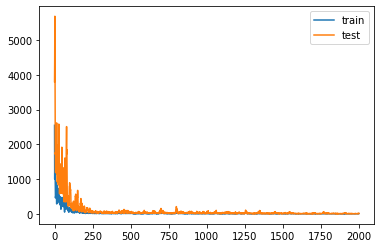

In [21]:
from matplotlib import pyplot

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

# We now get the RMSE for both train and test sets to see if they differ by much

# Make predictions based on train set and get a root mean squared error 

In [22]:
from sklearn.metrics import mean_squared_error
import math

train_yhat = simple_dense_model.predict(train_X_Dense)
mse = mean_squared_error(train_y, train_yhat)
rmse = math.sqrt(mse)

In [23]:
print('Train RMSE: ' + str(rmse))

Train RMSE: 12.853485657586463


# Make predictions based on test set and get a root mean squared error 

In [24]:
from sklearn.metrics import mean_squared_error
import math

test_yhat = simple_dense_model.predict(test_X_Dense)
mse = mean_squared_error(test_y, test_yhat)
rmse = math.sqrt(mse)

In [25]:
print('Test RMSE: ' + str(rmse))

Test RMSE: 27.29602668773447


# Plot train labels along with train predictions

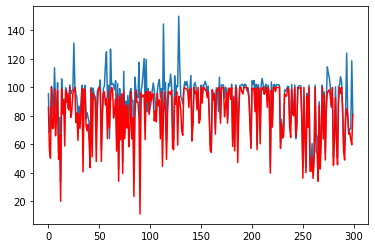

In [26]:
from matplotlib import pyplot

pyplot.plot(train_yhat, label='actual')
pyplot.plot(train_y, color='red', label='predicted')
pyplot.show()

# Plot test labels along with test predictions

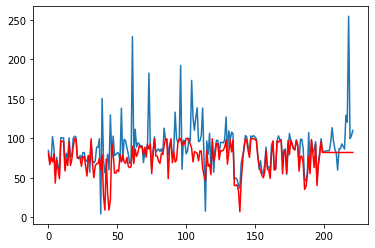

In [27]:
from matplotlib import pyplot

pyplot.plot(test_yhat, label='actual')
pyplot.plot(test_y, color='red', label='predicted')
pyplot.show()